In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('/content/heart.csv')

#EDA and preprossing

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.shape

# there are 918 rows and 12 columns

(918, 12)

In [7]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


there are 5 categorical features 6 numarical features and heartdisease is our dependent features

In [8]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


there are no missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: >

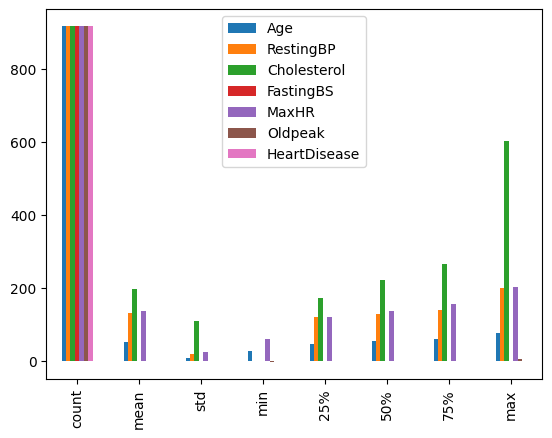

In [11]:
df.describe().plot(kind='bar')

1. the dataset is about people of age in the range of 28.77
2. 132 is the avarage value of restingBP
3. cholestrol of given people is btw 0-603

In [12]:
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


1. ChestPainType are of 4
2. fastingBS, restingECG are given in categories insted of numaric value
3. heart disease is a target variable with yes or no values


In [13]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


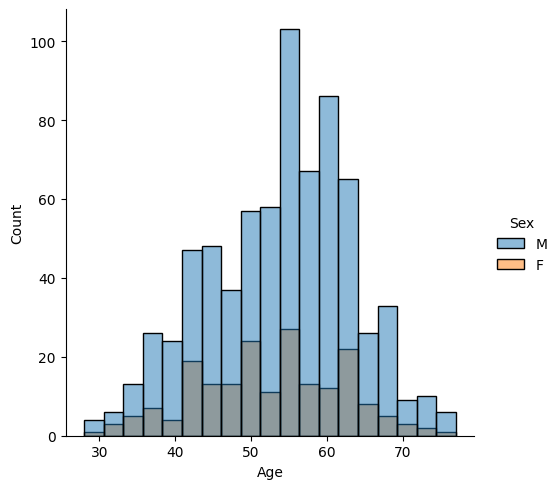

In [14]:
sns.displot(x=df['Age'],hue=df['Sex'])

1. In this particuler data we have more males then females
2. majority of people are age btw 45-65

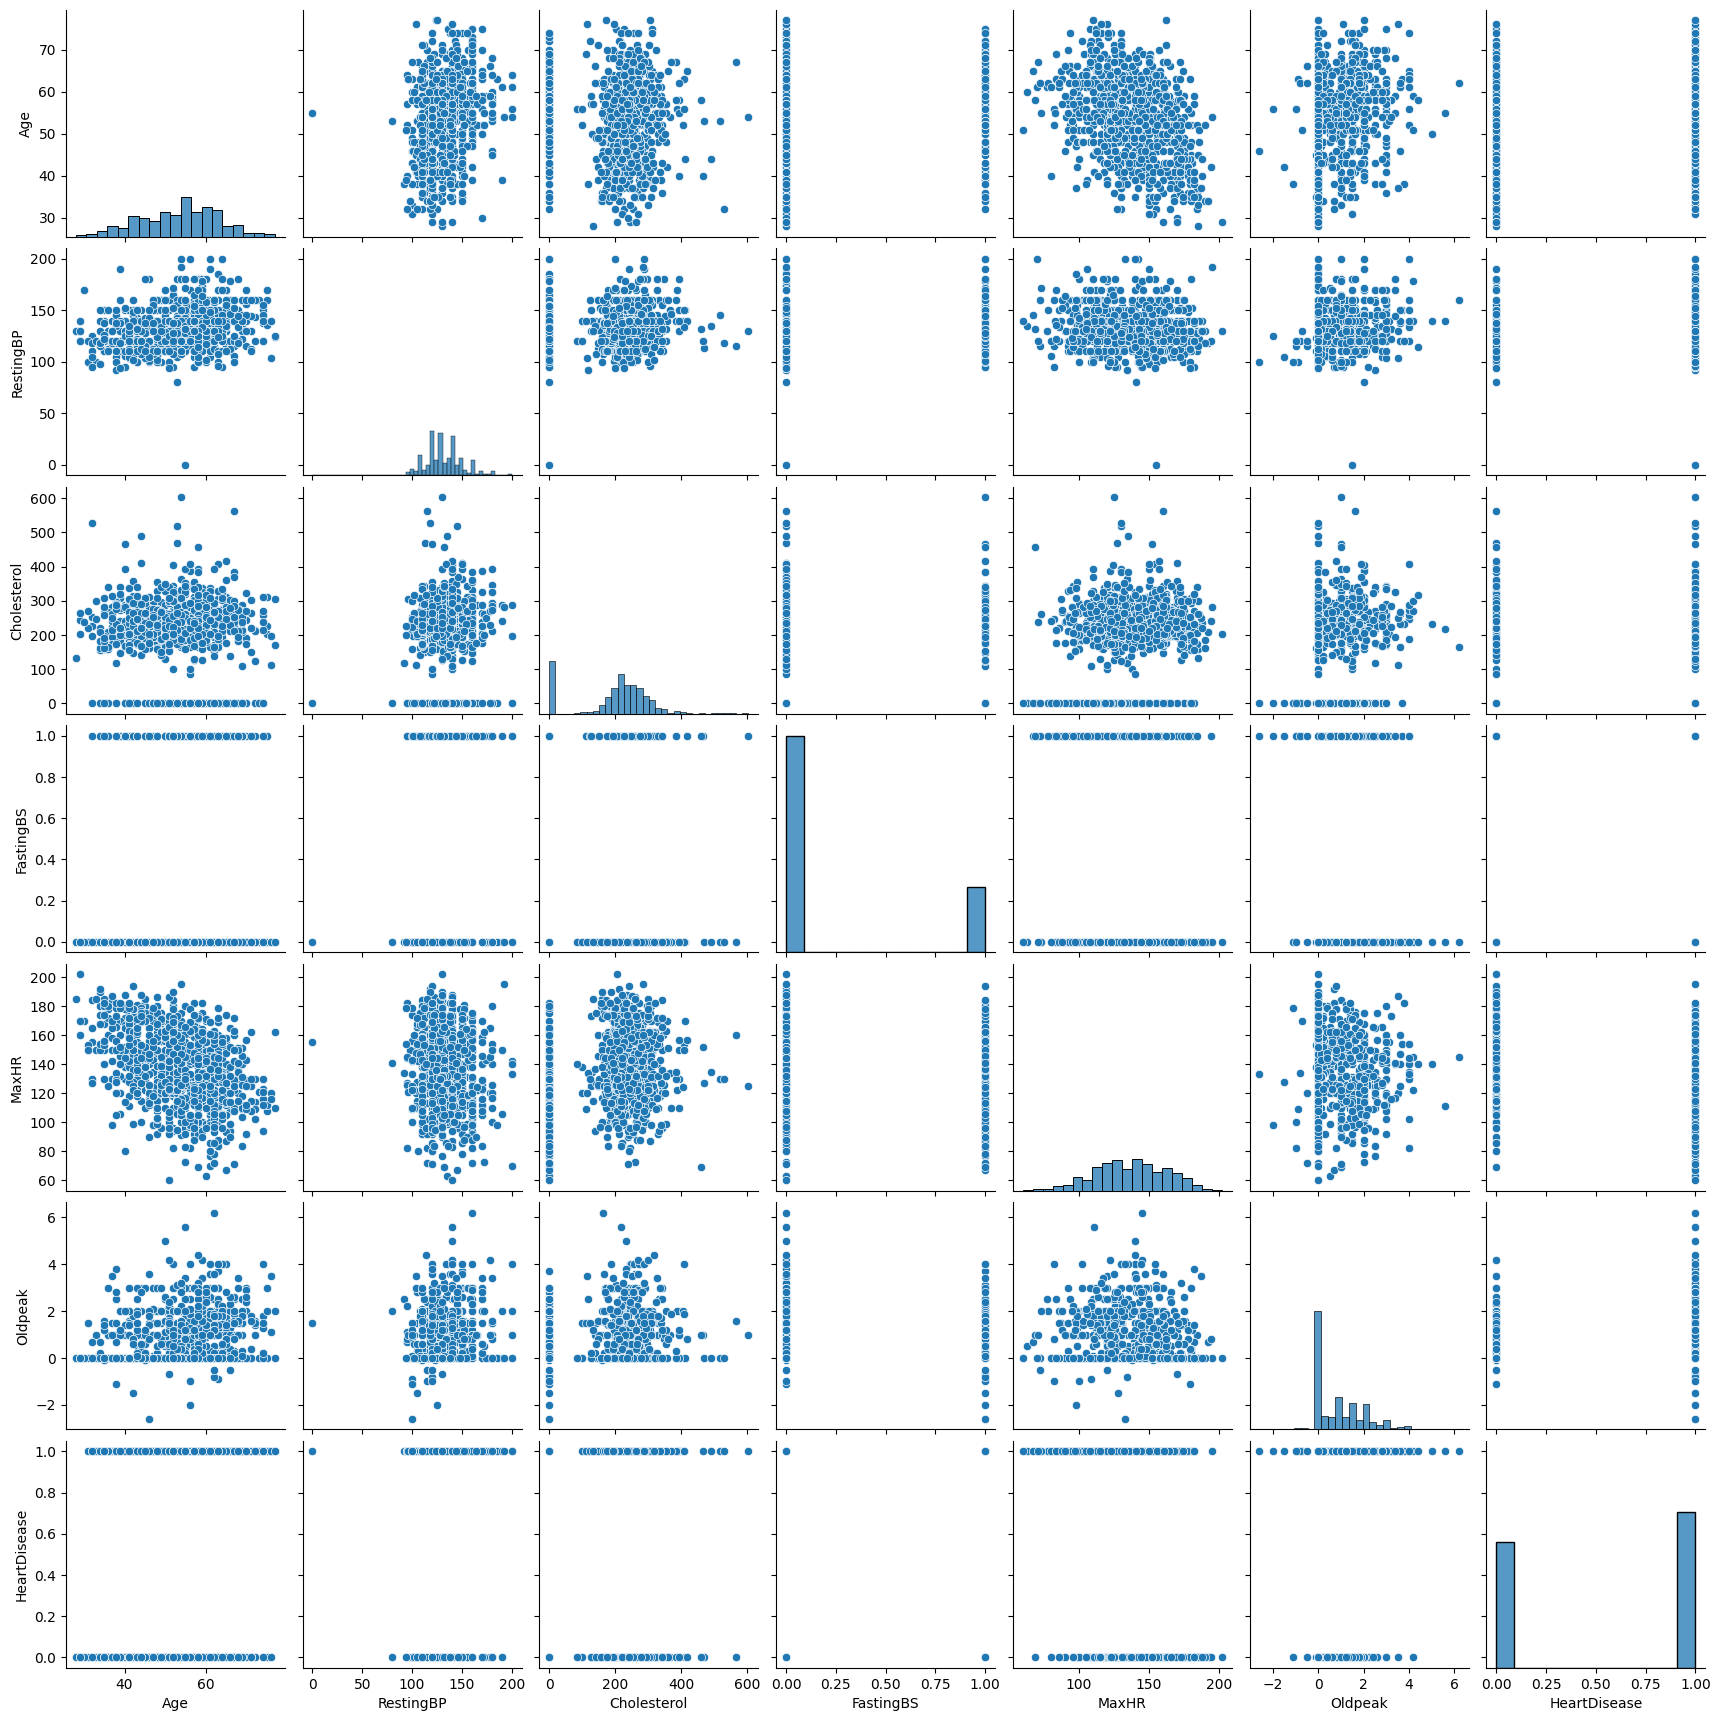

In [15]:
sns.pairplot(df)

<Axes: xlabel='Age'>

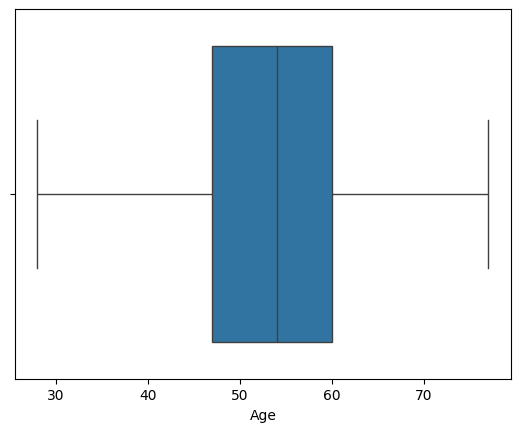

In [16]:

   sns.boxplot(x=df['Age'])

age column is in normal range there is no outlier

<Axes: xlabel='RestingBP'>

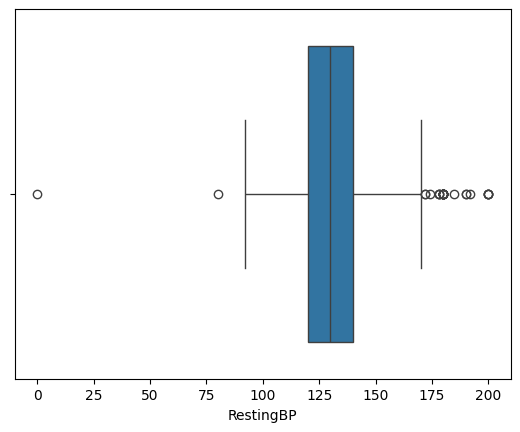

In [17]:
sns.boxplot(x=df['RestingBP'])

there are outliers in resting BP feature out of wihch one outlier having value 0 seems to be error so we will be delete the row

In [18]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [19]:
df.iloc[449,:]

,449
Age,55
Sex,M
ChestPainType,NAP
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,Normal
MaxHR,155
ExerciseAngina,N
Oldpeak,1.5


In [20]:
df=df.drop(index=449, axis=0)

<Axes: xlabel='Cholesterol'>

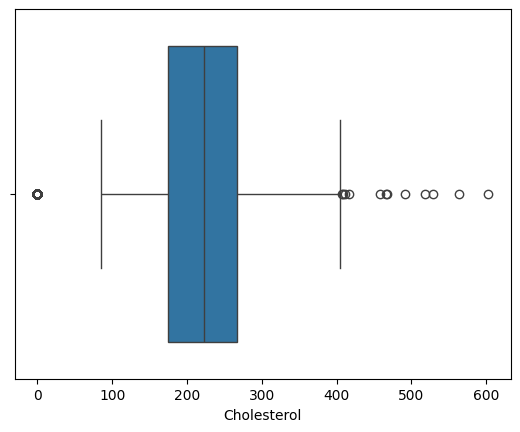

In [21]:
sns.boxplot(x=df['Cholesterol'])

there are many outliers in cholestrol features

<Axes: xlabel='MaxHR'>

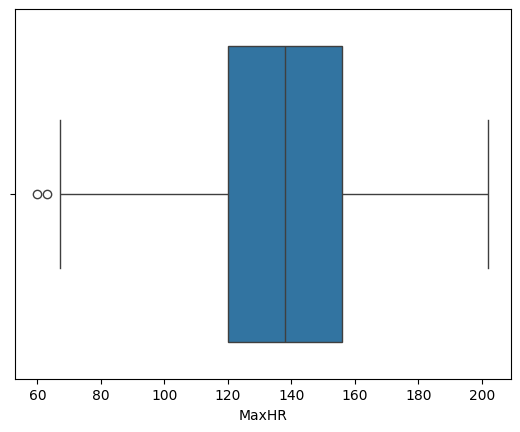

In [22]:
sns.boxplot(x=df['MaxHR'])

there are only few outliers in maxhr but none seen

<Axes: xlabel='Oldpeak'>

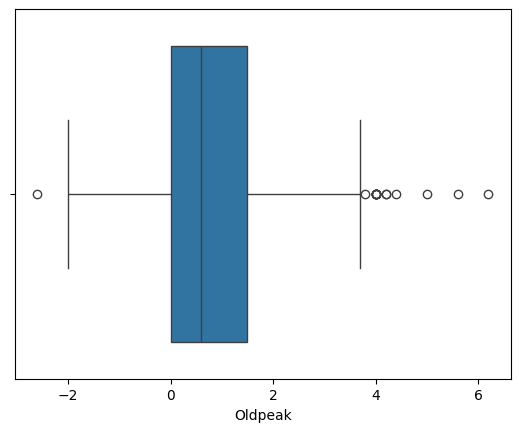

In [23]:
sns.boxplot(x=df['Oldpeak'])

there are many outliers in oldpeak features

<Axes: xlabel='Sex', ylabel='count'>

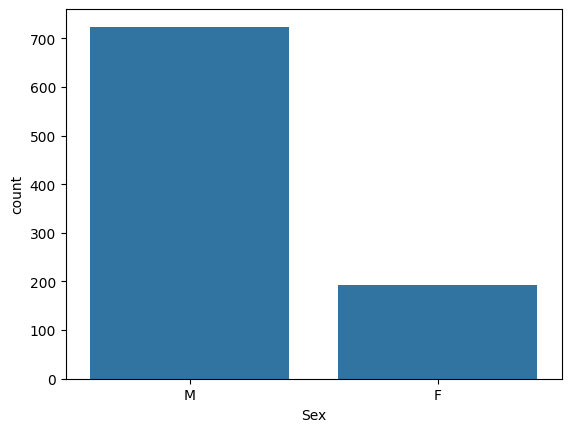

In [24]:
sns.countplot(x=df['Sex'])

there are more males compare to females

In [25]:
df['Sex'].value_counts()

,count
Sex,
M,724
F,193


there are more males then females

<Axes: xlabel='ChestPainType', ylabel='count'>

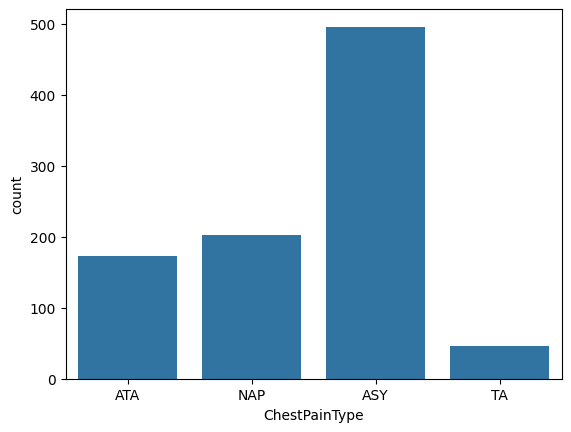

In [26]:
sns.countplot(x=df['ChestPainType'])

there are four types chestpain among this four ASY is highest and lowest is TA

<Axes: xlabel='RestingECG', ylabel='count'>

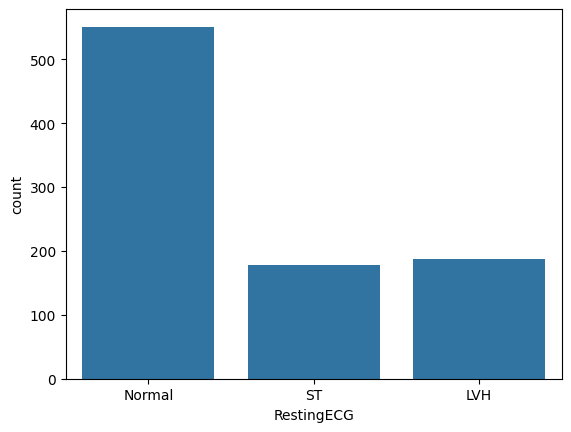

In [27]:
sns.countplot(x=df['RestingECG'])

majority people have normal restingECg

<Axes: xlabel='ExerciseAngina', ylabel='count'>

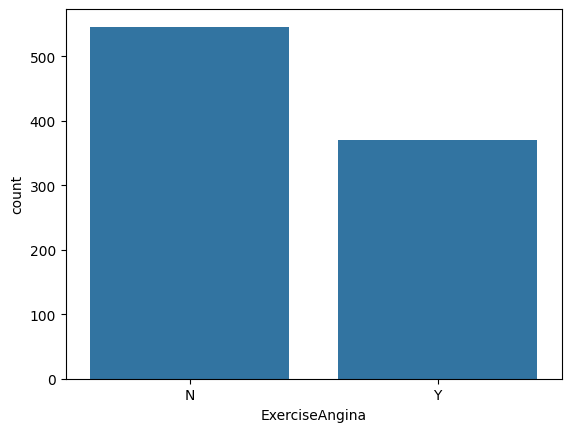

In [28]:
sns.countplot(x=df['ExerciseAngina'])

In [29]:
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,546
Y,371


In [30]:
371/(546+371)*100

40.458015267175576

there are around 40% people with exerciseangina

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [33]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [34]:
df['Sex']=le.fit_transform(df['Sex'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

there is no orignal data so we have to used label encoder insted of mapping

In [35]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


In [36]:
x=df.drop(columns=['HeartDisease'],axis=1)
y=df['HeartDisease']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123, stratify=y)

#model selection

1. as data is small ans has binary classes we will implement logistic regrassion
2. as data is small and liner we will impliment svm
3. there are 7 categorical columns so we will be implimenting decision tree

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LR=LogisticRegression()

In [41]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred=LR.predict(x_test)

In [43]:
from sklearn.metrics import classification_report

In [46]:
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       123
           1       0.86      0.82      0.84       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



#svm

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

to get the best kernal for our dataset we will implement hyper parameter turing using grid search cv

In [48]:
SVC=SVC()

In [49]:
param={'kernel':['linear','poly','rbf','sigmoid']}

In [50]:
gs=GridSearchCV(SVC,param_grid=param, scoring='accuracy',)

In [51]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [52]:
gs.best_estimator_.fit(x_train,y_train)

SVC(kernel='linear')

In [53]:
y_pred=gs.predict(x_test)

In [54]:
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.87      0.86      0.86       153

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
DT=DecisionTreeClassifier()

In [57]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=DT.predict(x_test)

In [59]:
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       123
           1       0.80      0.79      0.80       153

    accuracy                           0.78       276
   macro avg       0.77      0.77      0.77       276
weighted avg       0.78      0.78      0.78       276



among the three algorithm we used svm is giving the best result so we will go with svm for this data